**Tìm hiểu các mối quan hệ**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('COVID_4-19.csv')
data.head()

,Country,Total Cases,New Cases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent
0,USA,32476153,51653.0,581573,498.0,25043463,6851117,9815.0,97655.0,1749.0,430886619.0,1295672.0,332558517,North America
1,India,15314714,256947.0,180550,1757.0,13103220,2030944,8944.0,11011.0,130.0,267894549.0,192610.0,1390864355,Asia
2,Brazil,13977713,34642.0,375049,1607.0,12460712,1141952,8318.0,65387.0,1754.0,28600000.0,133789.0,213770046,South America
3,France,5296822,7296.0,101222,489.0,4151289,1044311,5970.0,81004.0,1548.0,72613536.0,1110478.0,65389433,Europe
4,Russia,4710690,8589.0,105928,346.0,4333598,271164,2300.0,32268.0,726.0,126000000.0,863104.0,145984714,Europe


In [4]:
data.shape

(221, 14)

In [5]:
data.dtypes

Country              object
Total Cases           int64
New Cases           float64
TotalDeaths          object
NewDeaths           float64
TotalRecovered        int64
ActiveCases           int64
Serious             float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population           object
Continent            object
dtype: object

In [6]:
data.iloc[216]

Country             MS Zaandam
Total Cases                  9
New Cases                  NaN
TotalDeaths                 2 
NewDeaths                  NaN
TotalRecovered               7
ActiveCases                  0
Serious                    NaN
Tot Cases/1M pop           NaN
Deaths/1M pop              NaN
Total Tests                NaN
Tests/1M pop               NaN
Population                    
Continent                  NaN
Name: 216, dtype: object

In [7]:
data['Continent'].items()

In [8]:
data['New Cases'] = data['New Cases'].fillna(0)

In [9]:
data['NewDeaths'] = data['NewDeaths'].fillna(0)

In [10]:
data['Serious'] = data['Serious'].fillna(0)

In [11]:
data['Continent'] = data['Continent'].replace(np.nan,'Other')

In [12]:
for idx,value in data['Continent'].items():
    print(value)

North America
Asia
South America
Europe
Europe
Europe
Asia
Europe
Europe
Europe
South America
Europe
South America
North America
Asia
Europe
South America
Asia
Europe
Africa
Europe
North America
South America
Europe
Asia
Europe
Asia
Europe
Asia
Europe
Asia
Europe
Asia
Asia
Europe
Europe
Europe
Asia
Asia
Africa
Asia
Asia
Europe
Asia
Europe
North America
South America
Europe
Europe
Europe
Asia
Asia
Asia
South America
Africa
Asia
Asia
North America
Asia
South America
Europe
Europe
Africa
Europe
Europe
Europe
North America
Africa
North America
Asia
North America
Asia
Europe
South America
Asia
Africa
South America
Asia
Africa
Africa
Europe
Asia
Europe
Africa
Europe
Asia
Europe
Europe
Asia
Europe
North America
Asia
Africa
Africa
Asia
Asia
Europe
Africa
North America
Europe
Africa
Asia
Asia
Asia
Africa
Africa
Africa
North America
Asia
Africa
Africa
Africa
Africa
Africa
Africa
Europe
Australia/Oceania
Africa
Asia
Africa
Africa
Asia
Africa
Africa
Asia
Africa
Africa
Australia/Oceania
Africa
Afri

In [13]:
data['Continent'].unique()

array(['North America', 'Asia', 'South America', 'Europe', 'Africa',
       'Australia/Oceania', 'Other'], dtype=object)

In [14]:
data['New Cases'] == 0.0

0      False
1      False
2      False
3      False
4      False
       ...  
216     True
217     True
218     True
219     True
220     True
Name: New Cases, Length: 221, dtype: bool

In [15]:
data['Continent'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
216    False
217    False
218    False
219    False
220    False
Name: Continent, Length: 221, dtype: bool

In [16]:
data.iloc[216]

Country             MS Zaandam
Total Cases                  9
New Cases                    0
TotalDeaths                 2 
NewDeaths                    0
TotalRecovered               7
ActiveCases                  0
Serious                      0
Tot Cases/1M pop           NaN
Deaths/1M pop              NaN
Total Tests                NaN
Tests/1M pop               NaN
Population                    
Continent                Other
Name: 216, dtype: object

In [17]:
data['Continent'].dropna()

0          North America
1                   Asia
2          South America
3                 Europe
4                 Europe
             ...        
216                Other
217    Australia/Oceania
218    Australia/Oceania
219    Australia/Oceania
220    Australia/Oceania
Name: Continent, Length: 221, dtype: object

In [18]:
data['Continent'].isna().sum()

0

In [19]:
data.isna().sum()

Country              0
Total Cases          0
New Cases            0
TotalDeaths          0
NewDeaths            0
TotalRecovered       0
ActiveCases          0
Serious              0
Tot Cases/1M pop     2
Deaths/1M pop       17
Total Tests         11
Tests/1M pop        11
Population           0
Continent            0
dtype: int64

---
bỏ dòng *MS Zaandam* với *Diamond Princess*

Replace = 0 tất cả ô thiếu

Chuyển total death, Populrtion sang int64




In [20]:
data_ele = data.loc[(data["Country"] == 'MS Zaandam') | (data["Country"] == 'Diamond Princess')]
data = data.drop(data.index[list(data_ele.index)])
data = data.replace(r'^\s*$', 0, regex=True)
data['TotalDeaths'] = data['TotalDeaths'].astype('int64')

In [21]:
data['Population'] = data['Population'].astype('int64')

In [22]:
data.dtypes

Country              object
Total Cases           int64
New Cases           float64
TotalDeaths           int64
NewDeaths           float64
TotalRecovered        int64
ActiveCases           int64
Serious             float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population            int64
Continent            object
dtype: object

In [23]:
data1 = data[['Country','Total Cases','TotalDeaths']]


In [24]:
data1.head()

,Country,Total Cases,TotalDeaths
0,USA,32476153,581573
1,India,15314714,180550
2,Brazil,13977713,375049
3,France,5296822,101222
4,Russia,4710690,105928


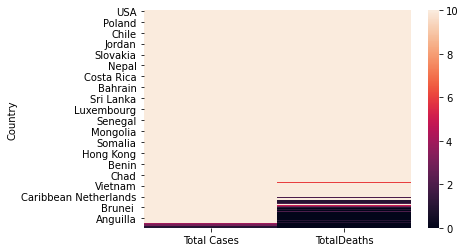

In [135]:
test = data[['Country','Total Cases','TotalDeaths']]
test.set_index('Country',inplace = True)
test
gx = sns.heatmap(test,vmin = 0, vmax = 10)

<ipython-input-125-7640e53efddd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_total_cases_population.sort_values(by = 'New Cases', ascending = False, ignore_index = True, inplace = True)


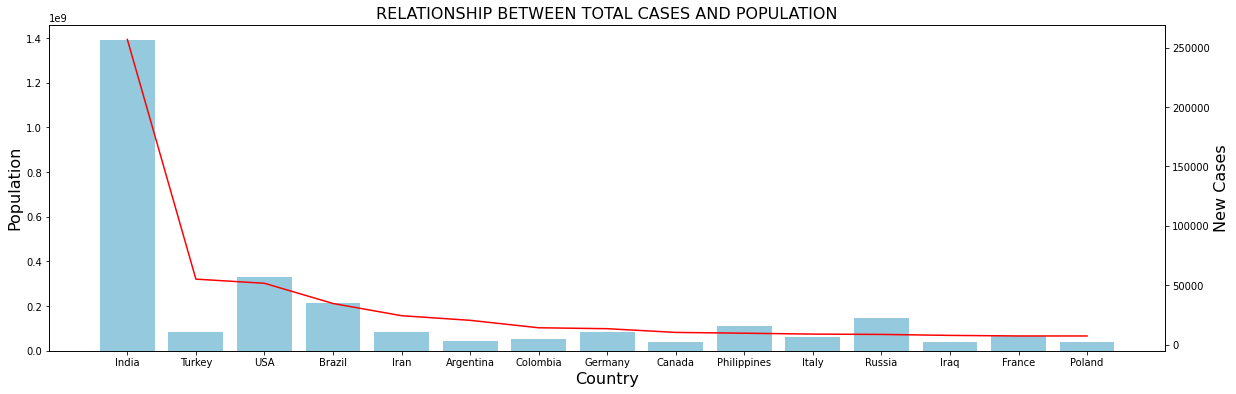

In [125]:
#
top15_total_cases_population = data[['Country','New Cases','Population']]
top15_total_cases_population.sort_values(by = 'New Cases', ascending = False, ignore_index = True, inplace = True)
top15_total_cases_population = top15_total_cases_population.head(15)
#
fig ,cx1 = plt.subplots(figsize = (20,6))
color = 'Skyblue'
#
cx1.set_title('RELATIONSHIP BETWEEN TOTAL CASES AND POPULATION', fontsize = 16)
cx1.set_xlabel('Country', fontsize = 16)
cx1.set_ylabel('New Cases', fontsize = 16)
cx1 = sns.barplot(x = 'Country', y = 'Population', data = top15_total_cases_population, color = color)

cx2 = cx1.twinx()

cx2.set_ylabel('New Cases', fontsize = 16)
color = 'Red'
cx2 = sns.lineplot(x = 'Country', y = 'New Cases', data = top15_total_cases_population, color = color)


<ipython-input-99-657fa949c83f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_new_cases.sort_values(by = 'New Cases', ascending = False,ignore_index=True, inplace = True)


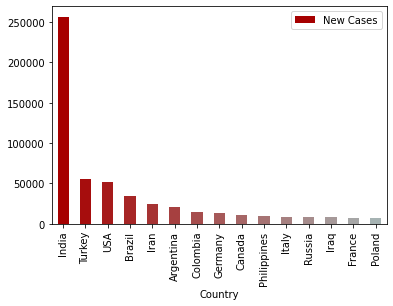

In [99]:
top15_new_cases = data[['Country','New Cases']]
top15_new_cases.sort_values(by = 'New Cases', ascending = False,ignore_index=True, inplace = True)
top15_new_cases = top15_new_cases.head(15)
##
my_colors = [(0.65, x/20.0, x/20.0) for x in range(20)]
##

##
ax = top15_new_cases.plot.bar(x = 'Country', y = 'New Cases', rot = 90, color = my_colors)

<ipython-input-100-c0b8d05001fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_new_deaths.sort_values(by = 'NewDeaths', ascending = False, ignore_index = True, inplace = True)


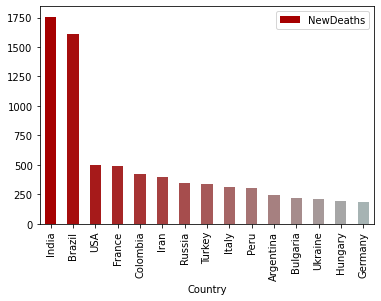

In [100]:
top15_new_deaths = data[['Country','NewDeaths']]
top15_new_deaths.sort_values(by = 'NewDeaths', ascending = False, ignore_index = True, inplace = True)
top15_new_deaths = top15_new_deaths.head(15)
my_colors = [(0.65, x/20.0, x/20.0) for x in range(20)]
bx = top15_new_deaths.plot.bar(x = 'Country', y = 'NewDeaths', rot = 90, color = my_colors)

In [ ]:
top15_deaths = data1[['Country','TotalDeaths']]
top15_deaths.sort_values(by = 'TotalDeaths', ascending = False,ignore_index=True, inplace = True)
top15_deaths.head(15)

<ipython-input-34-502278918aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_deaths.sort_values(by = 'TotalDeaths', ascending = False,ignore_index=True, inplace = True)


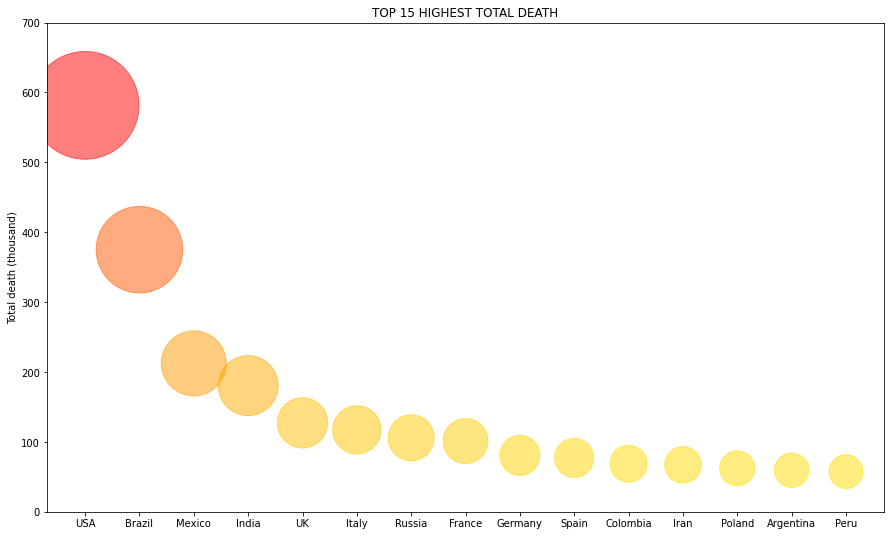

In [34]:
top15_deaths = data1[['Country','TotalDeaths']]
top15_deaths.sort_values(by = 'TotalDeaths', ascending = False,ignore_index=True, inplace = True)
top15_deaths = top15_deaths.head(15)

names = top15_deaths['Country']
values = top15_deaths['TotalDeaths']

color = []
s = 0
for i in range(len(names)-1):
        color.append((1,s/600000,0))
        s += (values[i] - values[i+1])
color.append((1,s/600000,0))
plt.figure(figsize=(15, 9))
plt.ylim([0,700])
plt.scatter( x = names, y = values/1000,
             s = values/50, c = color, alpha=0.5)
plt.ylabel('Total death (thousand)' )
plt.title('TOP 15 HIGHEST TOTAL DEATH')
plt.show()

<BarContainer object of 15 artists>

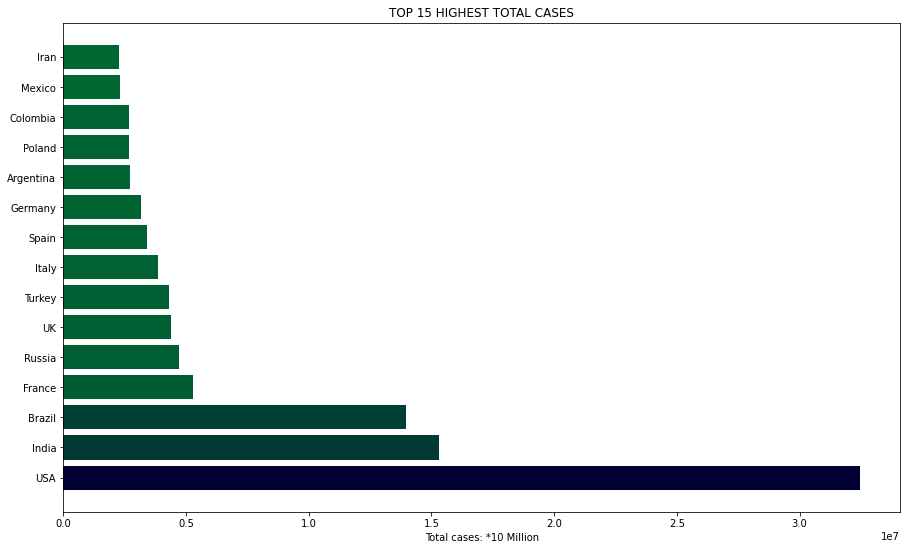

In [35]:
top15_case = data[['Country','Total Cases']]

top15_case = top15_case.head(15)

names = top15_case['Country']
values = top15_case['Total Cases']

c = []
s = 0
for i in range(len(names)-1):
        c.append((0,s/75_000_000,0.2))
        s += (values[i] - values[i+1])
c.append((0,s/75_000_000,0.2))

c
plt.figure(figsize=(15, 9))

plt.title('TOP 15 HIGHEST TOTAL CASES')
plt.xlabel('Total cases: *10 Million')

plt.barh(names, values,color = c)

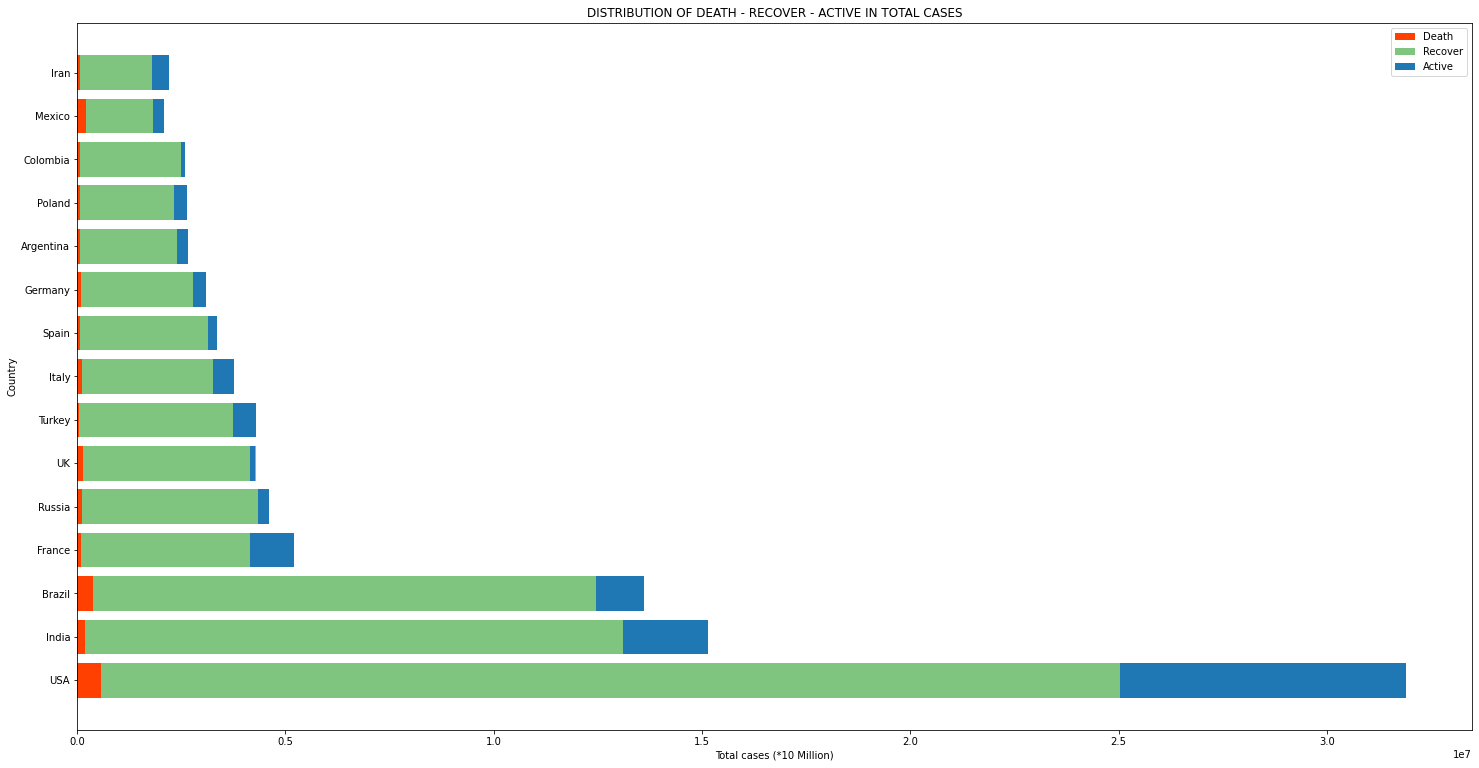

In [36]:
top15_distribute = data[['Country','TotalDeaths','TotalRecovered','ActiveCases']].head(15)


labels = top15_distribute['Country']
death = top15_distribute['TotalDeaths']
recover = top15_distribute['TotalRecovered']
active = top15_distribute['ActiveCases']

       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(25,13))

ax.barh(labels, death , label='Death',color = (1,0.25,0))
ax.barh(labels, recover, left = death,label='Recover',color = (0,0.55,0),alpha = 0.5)
ax.barh(labels, active,  left = recover,label='Active')

ax.set_ylabel('Country')
ax.set_xlabel('Total cases (*10 Million)')
ax.set_title('DISTRIBUTION OF DEATH - RECOVER - ACTIVE IN TOTAL CASES')
ax.legend()

plt.show()

---
Mối quan hệ giữa số cases và số chết: có thế có đường thằng tuyến tính

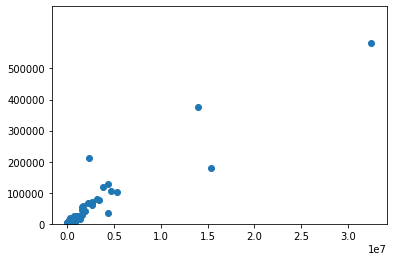

In [37]:
x = data1['Total Cases']
y = data1['TotalDeaths']


plt.ylim([0, 700000])
plt.yticks(np.arange(min(y), max(y)+1, 100000))
plt.scatter(x,y)
plt.show()

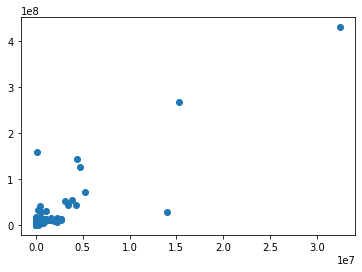

In [38]:
x = data['Total Cases']
y = data['Total Tests']

plt.scatter(x,y)
plt.show()

In [39]:
continent_data = data.groupby(by = 'Continent').sum()
continent_data

,Total Cases,New Cases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
Continent,,,,,,,,,,,,
Africa,4478163,8927.0,118501,234.0,3996320,363342,3776.0,422743.0,6750.8,42971859.0,4185245.0,1366127240
Asia,34204503,400161.0,470857,3295.0,29740820,3992826,29611.0,1106331.0,10906.9,727097321.0,25980954.0,4636590526
Australia/Oceania,61466,260.0,1175,2.0,34790,25501,4.0,109228.0,1003.0,18545555.0,2283559.0,42691595
Europe,42967972,99538.0,978619,2827.0,37332669,4656684,32666.0,3283840.0,62474.0,708579796.0,61874902.0,747993083
North America,37506600,67278.0,847593,708.0,29188674,7470333,17193.0,1092296.0,14854.0,479988831.0,23165738.0,592803946
South America,23491992,85708.0,626273,2852.0,21120280,1745439,24924.0,529850.0,11860.0,84287132.0,5382878.0,433604585


In [40]:
test_1M_percentage = (continent_data['Tests/1M pop']/sum(continent_data['Tests/1M pop'])*100).round(2)
test_1M_percentage                      

Continent
Africa                3.41
Asia                 21.14
Australia/Oceania     1.86
Europe               50.36
North America        18.85
South America         4.38
Name: Tests/1M pop, dtype: float64

In [41]:
continent_data.index

Index(['Africa', 'Asia', 'Australia/Oceania', 'Europe', 'North America',
       'South America'],
      dtype='object', name='Continent')

In [42]:
data['Continent'].unique()

array(['North America', 'Asia', 'South America', 'Europe', 'Africa',
       'Australia/Oceania'], dtype=object)

In [43]:
list(continent_data['Total Cases'])

[4478163, 34204503, 61466, 42967972, 37506600, 23491992]

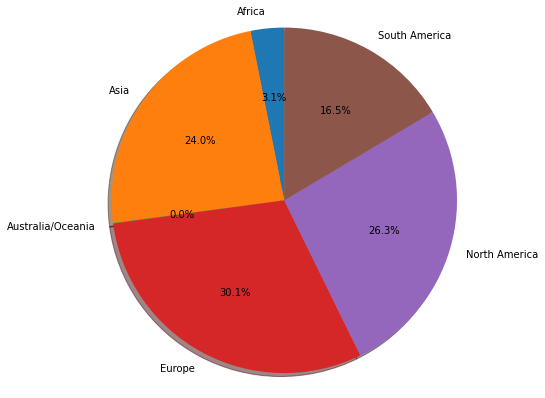

In [44]:
#Continent
#Total Cases
labels = list(continent_data.index)
sizes = list(continent_data['Total Cases'])
explode = (0,0,0,0,0,0)
plt.figure(figsize = (7,7))
plt.pie(sizes,labels = labels, autopct = '%1.1f%%', explode = explode, shadow = True, startangle = 90)
plt.axis('image')
plt.show()

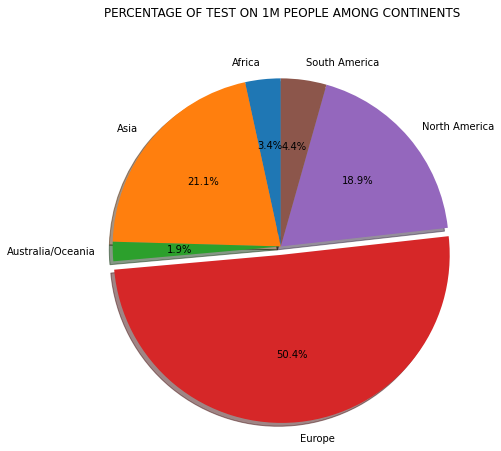

In [45]:
labels = list(continent_data.index)
sizes = list(test_1M_percentage)
explode = (0,0,0,0.05,0,0)
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',explode = explode,
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("PERCENTAGE OF TEST ON 1M PEOPLE AMONG CONTINENTS", y = 1.1)
plt.show()

In [ ]:
positive = (continent_data['Total Cases']/continent_data['Total Tests']*100).round(2)
negative = ((continent_data['Total Tests'] - continent_data['Total Cases']) / continent_data['Total Tests']*100).round(2)
negative_positive = pd.DataFrame({
                                  'Pos':positive,
                                  'Nega':negative})

NameError: name 'negative_positive' is not defined

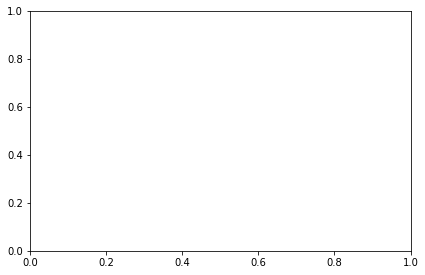

In [101]:
explode = (0,0.1)
labels = ['Postive','Negative']
colors = ['beige','paleturquoise']

fig = plt.figure(figsize = (15,15))

plt.subplot(321)
plt.pie(negative_positive[negative_positive.index == 'Asia'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Asia', fontsize = 15)


plt.subplot(322)
plt.pie(negative_positive[negative_positive.index == 'North America'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('North America', fontsize = 15)

plt.subplot(323)
plt.pie(negative_positive[negative_positive.index == 'South America'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('South America', fontsize = 15)

plt.subplot(324)
plt.pie(negative_positive[negative_positive.index == 'Europe'].values.tolist()[0],labels = labels, explode = explode, autopct = '%.1f%%', 
        startangle = 90, colors = colors, shadow = True)
plt.title('Europe', fontsize = 15)

plt.suptitle('Continent-Wise Tested Positive & Negative Percentage Composition', fontsize = 20)

---
Mối quan hệ giữa số cases và số test: có thế có đường thằng tuyến tính